C:\Users\hp\anaconda3\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


Enter your query: tale


C:\Users\hp\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


 books similar to the query term:
+----+-------------------------------+-----------------+-----------------------+--------------------+
|    |             Book              |    Author(s)    |         Genre         |  BERT_similarity   |
+----+-------------------------------+-----------------+-----------------------+--------------------+
| 0  |     A Tale of Two Cities      | Charles Dickens |  Historical fiction   | 0.6850864887237549 |
| 29 |   The Tale of Peter Rabbit    | Beatrix Potter  | Children's Literature | 0.5859900712966919 |
| 17 | Ben-Hur: A Tale of the Christ |   Lew Wallace   |  Historical fiction   | 0.5679582357406616 |
| 62 |          Love Story           |   Erich Segal   |     Romance novel     | 0.5224564075469971 |
+----+-------------------------------+-----------------+-----------------------+--------------------+


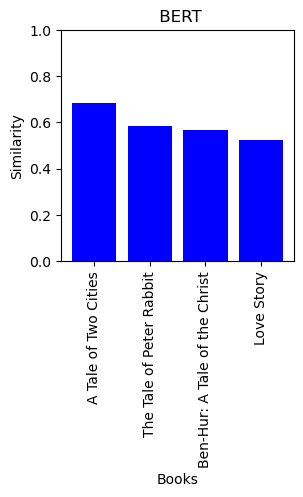

In [1]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import spacy
from tabulate import tabulate
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\hp\\Downloads\\news.csv")


nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    if pd.isnull(text):
        return "" 
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    return " ".join(tokens)


df['processed_text'] = df['Book'].apply(preprocess_text)


user_query = input("Enter your query: ")


model = SentenceTransformer('paraphrase-MiniLM-L6-v2')


document_embeddings = model.encode(df['processed_text'].tolist(), convert_to_tensor=True)
user_query_embedding = model.encode(user_query, convert_to_tensor=True)


similarities = util.pytorch_cos_sim(user_query_embedding, document_embeddings).cpu().detach().numpy().flatten()

threshold = 0.5
query_similar_books = df[similarities > threshold].copy()

query_similar_books['BERT_similarity'] = similarities[similarities > threshold]
query_similar_books = query_similar_books.sort_values(by='BERT_similarity', ascending=False).head(10)


print(" books similar to the query term:")
table = query_similar_books[['Book', 'Author(s)', 'Genre', 'BERT_similarity']]
print(tabulate(table, headers='keys', tablefmt='pretty'))



plt.figure(figsize=(3, 3))
plt.bar(query_similar_books['Book'], query_similar_books['BERT_similarity'], color='blue')
plt.xlabel('Books')
plt.ylabel('Similarity')
plt.title(' BERT')
plt.xticks(rotation=90) 
plt.ylim(0, 1) 
plt.show()


Enter your query: tale
 books similar to the query term:
+----+-------------------------------+-----------------+-----------------------+---------------------+
|    |             Book              |    Author(s)    |         Genre         |  tfidf_similarity   |
+----+-------------------------------+-----------------+-----------------------+---------------------+
| 0  |     A Tale of Two Cities      | Charles Dickens |  Historical fiction   |  0.655241142049617  |
| 29 |   The Tale of Peter Rabbit    | Beatrix Potter  | Children's Literature | 0.5228296379052769  |
| 17 | Ben-Hur: A Tale of the Christ |   Lew Wallace   |  Historical fiction   | 0.44777574534359743 |
+----+-------------------------------+-----------------+-----------------------+---------------------+


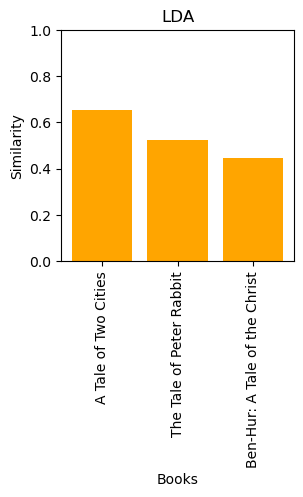

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
from tabulate import tabulate
import matplotlib.pyplot as plt 


df = pd.read_csv("C:\\Users\\hp\\Downloads\\news.csv")

nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    if pd.isnull(text):
        return ""  
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    return " ".join(tokens)

df['processed_text'] = df['Book'].apply(preprocess_text)

user_query = input("Enter your query: ")

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['processed_text'])

user_query_vector = tfidf_vectorizer.transform([user_query])

similarities = cosine_similarity(user_query_vector, X).flatten()

threshold = 0.4
query_similar_books = df[similarities > threshold].copy()

query_similar_books['tfidf_similarity'] = similarities[similarities > threshold]
query_similar_books = query_similar_books.sort_values(by='tfidf_similarity', ascending=False).head(10)

print(" books similar to the query term:")
table = query_similar_books[['Book', 'Author(s)', 'Genre', 'tfidf_similarity']]
print(tabulate(table, headers='keys', tablefmt='pretty'))

# Plotting the results
plt.figure(figsize=(3, 3))
plt.bar(query_similar_books['Book'], query_similar_books['tfidf_similarity'], color='orange')
plt.xlabel('Books')
plt.ylabel('Similarity')
plt.title('LDA')
plt.xticks(rotation=90)
plt.ylim(0, 1)  
plt.show()
